<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/S8/S8_mainFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision

In [0]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/S7_final')

In [0]:
# Apply Image Transforms

import data_transform as dt
import numpy as np
from torchvision import transforms

tl = dt.DataTransformandLoad()

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trainloader, testloader = tl.TransformAndLoad(mean1 = channel_means,stdev1 = channel_stdevs)

                                       

Files already downloaded and verified
Files already downloaded and verified


**Show some Images**

In [0]:
# Model Summary

import cifar10_models as models # drive
import resnet as rsnet
!pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = models.cfarResNet(False).to(device)
model =  rsnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [0]:

import execute # this is to train & test the model
import data_transform

model = rsnet.ResNet18().to(device)


 # this object, model of Net() class is passed onto Test_Train() object model's method train & test
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2697904109954834 Batch_id=390 Accuracy=44.31: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 5293/10000 (52.93%)

EPOCH: 2


Loss=1.0224789381027222 Batch_id=390 Accuracy=64.20: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 6308/10000 (63.08%)

EPOCH: 3


Loss=0.6088284254074097 Batch_id=390 Accuracy=73.73: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 7711/10000 (77.11%)

EPOCH: 4


Loss=0.6286864280700684 Batch_id=390 Accuracy=79.66: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 7337/10000 (73.37%)

EPOCH: 5


Loss=0.5091215372085571 Batch_id=390 Accuracy=83.62: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8175/10000 (81.75%)

EPOCH: 6


Loss=0.6281009316444397 Batch_id=390 Accuracy=86.65: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8387/10000 (83.87%)

EPOCH: 7


Loss=0.2276618480682373 Batch_id=390 Accuracy=89.31: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8257/10000 (82.57%)

EPOCH: 8


Loss=0.24703176319599152 Batch_id=390 Accuracy=91.44: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8468/10000 (84.68%)

EPOCH: 9


Loss=0.21151593327522278 Batch_id=390 Accuracy=93.59: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8372/10000 (83.72%)

EPOCH: 10


Loss=0.1387149840593338 Batch_id=390 Accuracy=95.39: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8500/10000 (85.00%)

EPOCH: 11


Loss=0.13387711346149445 Batch_id=390 Accuracy=96.87: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8489/10000 (84.89%)

EPOCH: 12


Loss=0.08605438470840454 Batch_id=390 Accuracy=98.21: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8685/10000 (86.85%)

EPOCH: 13


Loss=0.0158445592969656 Batch_id=390 Accuracy=99.12: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8774/10000 (87.74%)

EPOCH: 14


Loss=0.012685740366578102 Batch_id=390 Accuracy=99.68: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8793/10000 (87.93%)

EPOCH: 15


Loss=0.00838470458984375 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]


Validation loss has  decreased (0.0000 --> 0.0000).  Saving model ...

Test set: Average loss: 0.0000, Accuracy: 8800/10000 (88.00%)



Text(0.5, 1.0, 'Test Accuracy')

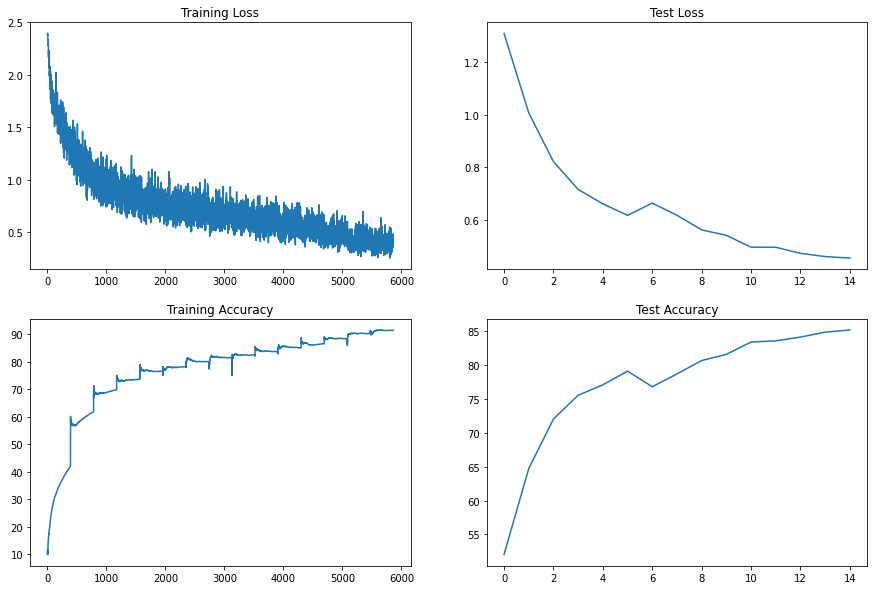

In [0]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")